<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_SubMaxArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del subarreglo de suma máxima
**Entrada**: Arreglo de números $[a_1,a_n]$

**Salida**: Subarreglo $[a_i,...,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro subarreglo, es decir $\sum \limits_{k=i}^j a_k\geq \sum\limits_{k=i'}^{j'} a_k$, para cualquier par $(i',j')$, con $i' \geq j' \geq n'$.

Como vimos en el informe anterior, analizamos la importancia del paradigma "**divide y vencerás**" en los algoritmos, como los de ordenamiento en el caso del MergeSort. Sin embargo, como es de suponerse éste tiene muchos más usos al momento de solucionar problemas. Uno de éstos es el llamado **problema del subarreglo máximo**. Tal y como dice su nombre, su función es encontrar el mayor subarreglo que tenga la suma máxima. Además, este es uno de los tantos problemas que entran en la categoría de **optimización**.

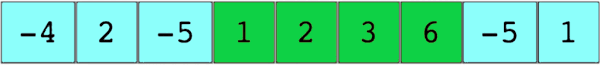

Sí, puede resultar en quizá un algoritmo bastante específico, pero aún así tiene aplicaciones en diversos campos, tales como el **análisis de secuencias genómicas** y la **visión por computadora**. En el caso de este último, la solución de este problema ayuda a detectar la subsecuencia con el mayor tanteo o "puntaje", lo que equivaliraría al área más brillante en una imagen bitmap. Esta imagen es un arreglo de dos dimensiones que contiene valores positivos, los que corresponden al brillo de la imagen como tal. Luego el algoritmo se evalúa tras normalizar cada valor en el arreglo al restarlos del "brillo medio".

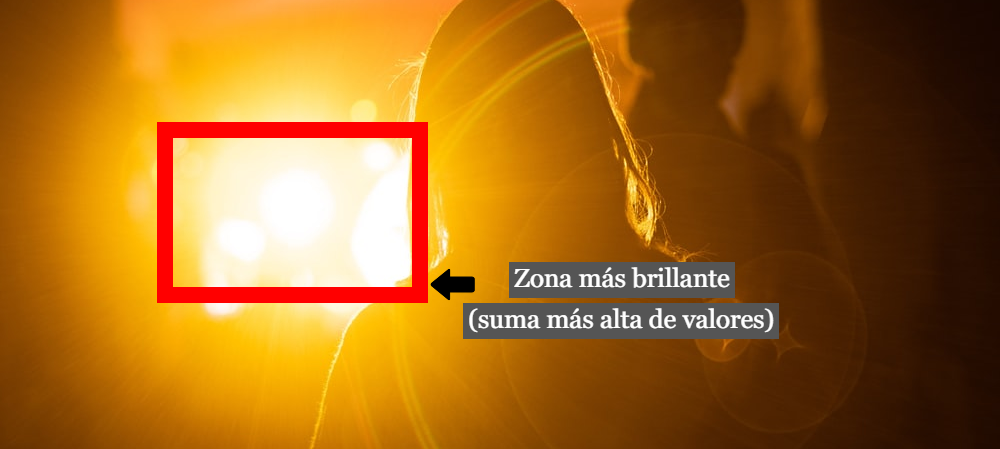

#2. Implementación del algoritmo

##2.1 Código
A continuación, se presenta una implementación del algoritmo estudiado.

In [130]:
from termcolor import cprint
import random

#Función que busca la máxima suma en un subarreglo que se encuentra al medio
def subMaxMidArray(A, start, mid, end, verbose = False):
  if verbose == True: print("\n###")
  leftSum = -10000 #Valor cercano a menos infinito que nos permite buscar la suma
  sum = 0 #Variable que acumula la suma máxima encontrada
  if verbose == True: print("Se ingresa a función que busca en el medio!")
  for i in range(mid, start-1, -1): #Se busca en el lado izquierdo
    sum = sum+A[i]
    if (sum>leftSum): #Si se encuentra la mayor suma en la izquierda
      leftSum = sum 
      maxLeft = i #Indice en donde comienza el subarreglo máximo
  
  if (verbose == True): 
    print(f"Suma máxima de la izquierda {A[start:mid+1]} del medio : {leftSum}")
    print(f"Posición donde comienza el subarreglo máximo: {maxLeft}")

  sum = 0
  rightSum = -10000 #Otro valor cercano a menos infinito

  for j in range(mid+1,end+1): #Se busca en el lado derecho
    sum = sum+A[j]
    if (sum > rightSum):
      rightSum = sum
      maxRight = j

  if (verbose == True): 
    print(f"Suma máxima de la derecha {A[mid+1:end+1]} del medio : {rightSum}")
    print(f"Posición donde termina el subarreglo máximo: {maxRight}")

  maxSum = leftSum+rightSum #Suma máxima en total

  if (verbose == True): print("###\n")

  return maxSum, maxLeft, maxRight #Se retorna la suma y sus índices

def subMaxArray(A, start, end, verbose = False):
  if (start == end): #Si el arreglo tiene solo un elemento, se retorna de inmediato
    if verbose == True: 
      print(f"\nSe retorna inmediatamente arreglo de un elemento: [{A[start]}]")
    return A[start], start, end
  
  mid = (start+end)//2 #Se divide el arreglo en dos
  if (verbose == True):
    if (len(A) > 1):
      print(f"\n¿Acaso estará en la izquierda del arreglo {A[start:mid+1]}?")
    leftMaxSum, leftStart, leftEnd = subMaxArray(A, start, mid, verbose = True)
    print(f"Suma máxima de la izquierda del arreglo {A[start:mid+1]}:",leftMaxSum)
  else:
    leftMaxSum, leftStart, leftEnd = subMaxArray(A, start, mid) #Llamada recursiva a la izquierda
  if (verbose == True):
    if (len(A) > 1):
      print(f"\n¿Acaso estará en la derecha del arreglo {A[mid+1:end+1]}?")
    rightMaxSum, rightStart, rightEnd = subMaxArray(A, mid+1, end, verbose = True)
    print(f"Suma máxima de la derecha del arreglo {A[mid+1:end+1]}:",rightMaxSum)
  else:
    rightMaxSum, rightStart, rightEnd = subMaxArray(A, mid+1, end) #Llamada recursiva a la derecha
  if (verbose == True):
    if (len(A) > 1):
      print("\n¿Acaso estará al medio del arreglo",f"{A[start:end+1]}","?")
    midMaxSum, midStart, midEnd = subMaxMidArray(A, start, mid, end, verbose = True)
    print(f"Suma máxima del medio del arreglo {A[start:end+1]}:",midMaxSum)
  else:
    midMaxSum, midStart, midEnd = subMaxMidArray(A, start, mid, end) #Se busca una suma máxima en una posición que intersecte 
                                                                     #tanto al subarreglo máximo derecho como al izquierdo

  #Se retorna la primera y última posición de dicho subarreglo, y su suma.
  if (leftMaxSum >= rightMaxSum and leftMaxSum >= midMaxSum):
    if verbose == True: 
      print(f"\nLa suma máxima está en la izquierda ({A[leftStart:leftEnd+1]}) del arreglo {A[start:end+1]}!")
      print("Esta fue:", leftMaxSum,"\n")
    return leftMaxSum, leftStart, leftEnd #La suma máxima está en la izquierda
  elif (rightMaxSum >= leftMaxSum and rightMaxSum >= midMaxSum):
    if verbose == True: 
      print(f"\nLa suma máxima está en la derecha! ({A[rightStart:rightEnd+1]} del arreglo {A[start:end+1]}!")
      print("Esta fue:", rightMaxSum,"\n")
    return rightMaxSum, rightStart, rightEnd #La suma máxima está en la derecha
  else:
    if verbose == True: 
      print(f"\nLa suma máxima está al medio! ({A[midStart:midEnd+1]}) del arreglo {A[start:end+1]}!")
      print("Esta fue:", midMaxSum,"\n")
    return midMaxSum, midStart, midEnd #La suma máxima está en un subarreglo al medio

#Ejemplo
#Se genera una lista de longitud aleatoria con números aleatorios
n = random.randint(1,6)
array = random.sample(range(-100,100),n)
print(f"Input: {array}")
sum, startMax, endMax = subMaxArray(array, 0, len(array)-1)
print("Max sum:", sum)
print("First position of the subMaxArray:",startMax)
print("Last position of the subMaxArray:",endMax)

Input: [1, 78, 52, 74, 6, -46]
Max sum: 211
First position of the subMaxArray: 0
Last position of the subMaxArray: 4


##2.2 Descripción del algoritmo

Como fue mencionado anteriormente, el algoritmo se encarga de buscar en un arreglo de $n$ elementos un subarreglo $[i,...,j]$ cuya suma de los números dentro de ella sean el máximo valor comparado con otros. En esta ocasión el enfoque para encontrar una solución recae sobre el paradigma **divide y vencerás**, por lo que para encontrar dicho subarreglo nuestra lista original se fragmentará en distintas partes que pueden o no ser la suma máxima que estamos buscando.

En general, el algoritmo del subarreglo de suma máxima funciona de la siguiente manera:

1. La función recibe un arreglo $A$, junto a su primer y último índice. Si este contiene solo un elemento se retorna de inmediato éste.
2. Se calcula cuál es la mitad de nuestro arreglo, y con llamadas recursivas se va viendo la máxima suma de las partes izquierdas y derechas.
3. Hacemos uso de otra función, la cual se encarga de calcular la máxima suma que se puede generar pasándose por el medio del arreglo, o el **punto de división**, la cual también puede contener valores de los fragmentos izquierda y derecha.
4. Finalmente retornamos la máxima suma entre los tres subarreglos, ya sea la izquierda, derecha o la mitad.

![image](https://media.geeksforgeeks.org/wp-content/cdn-uploads/kadane-Algorithm.png)

Para ver con más detalle cómo funciona el algoritmo, `verbose` debe ser igual a `True`.

##2.3 Ejemplo
Como muestra, usaremos el siguiente arreglo:

$a = [-6,-2,8,3,4,-2]$

Como $a$ contiene más de un elemento, este se divide en dos arreglos:

$l = [-6,-2,8]$ y $r = [3,4,-2]$

Comenzaremos por el de la izquierda. Como su longitud es igual a 3, entonces nuevamente llamaremos a **subMaxArray**, el cual lo dividirá en otros dos arreglos ($[-6,-2]$ y $[8]$). Como vemos, tenemos dos subarreglos. Uno de dos elementos, y otro con solamente uno. Seguiremos con el de la izquierda. A este nuevamente se le aplica la función, la cual ahora lo divide en dos valores distintos:

$[-6]$ y $[-2]$

Ambos son arreglos de un solo elemento, por lo que se retornan inmediatamente, comparándose entre sí como lado izquierdo y derecho. De esta forma, vemos como la suma máxima se encuentra en $[-2]$, aunque también para comprobar cada caso se llama a la función **subMaxMidArray**, la cual busca la suma máxima en aquel subarreglo que pase por el medio. En nuestro caso:

$[-6,-2] = -8$

Por lo tanto, nuestra máxima suma en esta sección está a la derecha. Es decir, tan solo el elemento $[-2]$.

Ahora volvemos con el elemento $[8]$ que habíamos dividido antes. Es solo un número, por lo que se retorna a la función. Al hacer esto, regresamos a nuestro subarreglo $l$ original. Puesto que ahora sabemos cuál es la suma máxima de su izquierda y derecha, solo faltaría calcular aquella que pasa por el medio.

$-6+-2+8 = 6$

Por lo tanto, el algoritmo confirma que, por lo menos en el lado izquierdo, la máxima suma se encuentra en el subarreglo $[8]$.

Ahora, se busca la máxima suma en el subarreglo $r = [3,4,-2]$, realizando el mismo proceso antes descrito. Este se subdivide en dos: $[3,4]$ y $[-2]$. Y otra vez sucede lo mismo con el primero, dividiéndose en dos subarreglos de un elemento cada uno. Repitiendo el paso a paso de algunas líneas atrás, el algoritmo nos entrega lo siguiente:

Suma máxima izquierda: $3+4 = 7$

Suma máxima derecha: $-2 = -2$

Suma máxima en medio: $3+4-2 = 5$.

Por lo tanto, se concluye que la máxima suma encontrada en la derecha se encuentra en el subarreglo $[3,4]$.

Finalmente, buscamos en el medio del arreglo original $a$. Así, la función que se encarga de esta sección nos retorna la siguiente información:

Suma máxima de la izquierda del medio: $8$

Suma máxima de la derecha del medio: $7$

Subarreglo con la suma máxima: $[8,3,4]$ (entre las posiciones $2$ y $4$)

Nótese que si bien ambas sumas en el medio son iguales a la izquierda y derecha que encontramos previamente, puede que esto no suceda en todos los casos.

Por lo tanto, y en conclusión, el algoritmo del subarreglo de suma máxima nos retorna que la máxima suma encontrada es igual a $15$, y se encuentra en el subarreglo $[8,3,4]$ de $a$.

En la imagen a continuación se puede apreciar una gráfica que muestra el proceso recién detallado.
![image](https://iq.opengenus.org/content/images/2019/07/maxium.png)

##2.4 Ejecución del algoritmo paso a paso (`verbose = True`)
A continuación, si se ejecuta el siguiente código con la opcion `verbose` activada, entonces se detallará cada movimiento del algoritmo.

In [114]:
a = random.sample(range(-100,100), 6)
cprint(f"Entrada: {a}", 'yellow')
maxSum, startMax, endMax = subMaxArray(a, 0, len(a)-1, verbose = True)
if (startMax == endMax): 
  cprint(f"\nSubarreglo máximo encontrado: [{a[startMax]}]", 'yellow')
else: 
  cprint(f"\nSubarreglo máximo encontrado: {a[startMax:endMax+1]}", 'yellow')
print("Suma máxima:",maxSum)
print("Inicio:",startMax,";","Final:",endMax)

Entrada: [1, -43, -29, 53, -57, 0]

¿Acaso estará en la izquierda del arreglo [1, -43, -29]?

¿Acaso estará en la izquierda del arreglo [1, -43]?

¿Acaso estará en la izquierda del arreglo [1]?

Se retorna inmediatamente arreglo de un elemento: [1]
Suma máxima de la izquierda del arreglo [1]: 1

¿Acaso estará en la derecha del arreglo [-43]?

Se retorna inmediatamente arreglo de un elemento: [-43]
Suma máxima de la derecha del arreglo [-43]: -43

¿Acaso estará al medio del arreglo [1, -43] ?

###
Se ingresa a función que busca en el medio!
Suma máxima de la izquierda [1] del medio : 1
Posición donde comienza el subarreglo máximo: 0
Suma máxima de la derecha [-43] del medio : -43
Posición donde termina el subarreglo máximo: 1
###

Suma máxima del medio del arreglo [1, -43]: -42

La suma máxima está en la izquierda ([1]) del arreglo [1, -43]!
Esta fue: 1 

Suma máxima de la izquierda del arreglo [1, -43]: 1

¿Acaso estará en la derecha del arreglo [-29]?

Se retorna inmediatamente arregl

# 3. Correctitud

##Teorema 1 (Correctitud de la función subMaxMidArray)

*El algoritmo **subMaxMidArray** retorna el resultado de la suma máxima de los valores consecutivos de un subarreglo $[i,...,j]$ que pase por el medio y contiene los elementos de un arreglo $[a_1,a_2,a_3,...a_n]$.*

###Prueba del teorema
En base a lo mencionado anteriormente, podemos definir la siguiente **propiedad invariante de bucle**:

> Al comienzo de cada i-ésima iteración en cada ciclo *for*, las sumatorias *leftSum* y *rightSum* contendrán la suma máxima contenida entre los subarreglos $A[i,..,mid]$ y $A[mid+1,...,j]$, siendo $mid$ la mitad del arreglo $A$, donde $low \leq i \leq mid$ y $mid+1 \leq j \leq high$.

###Inicialización
Previo a la primera iteración en ambos bucles, se asume que los elementos $A[mid]$ y $A[mid+1]$ son la máxima suma en esos momentos. Así mismo, los valores $leftSum$ y $rightSum$ son iguales a $0$, por lo que trivialmente la suma máxima en el arreglo es igual a este número.

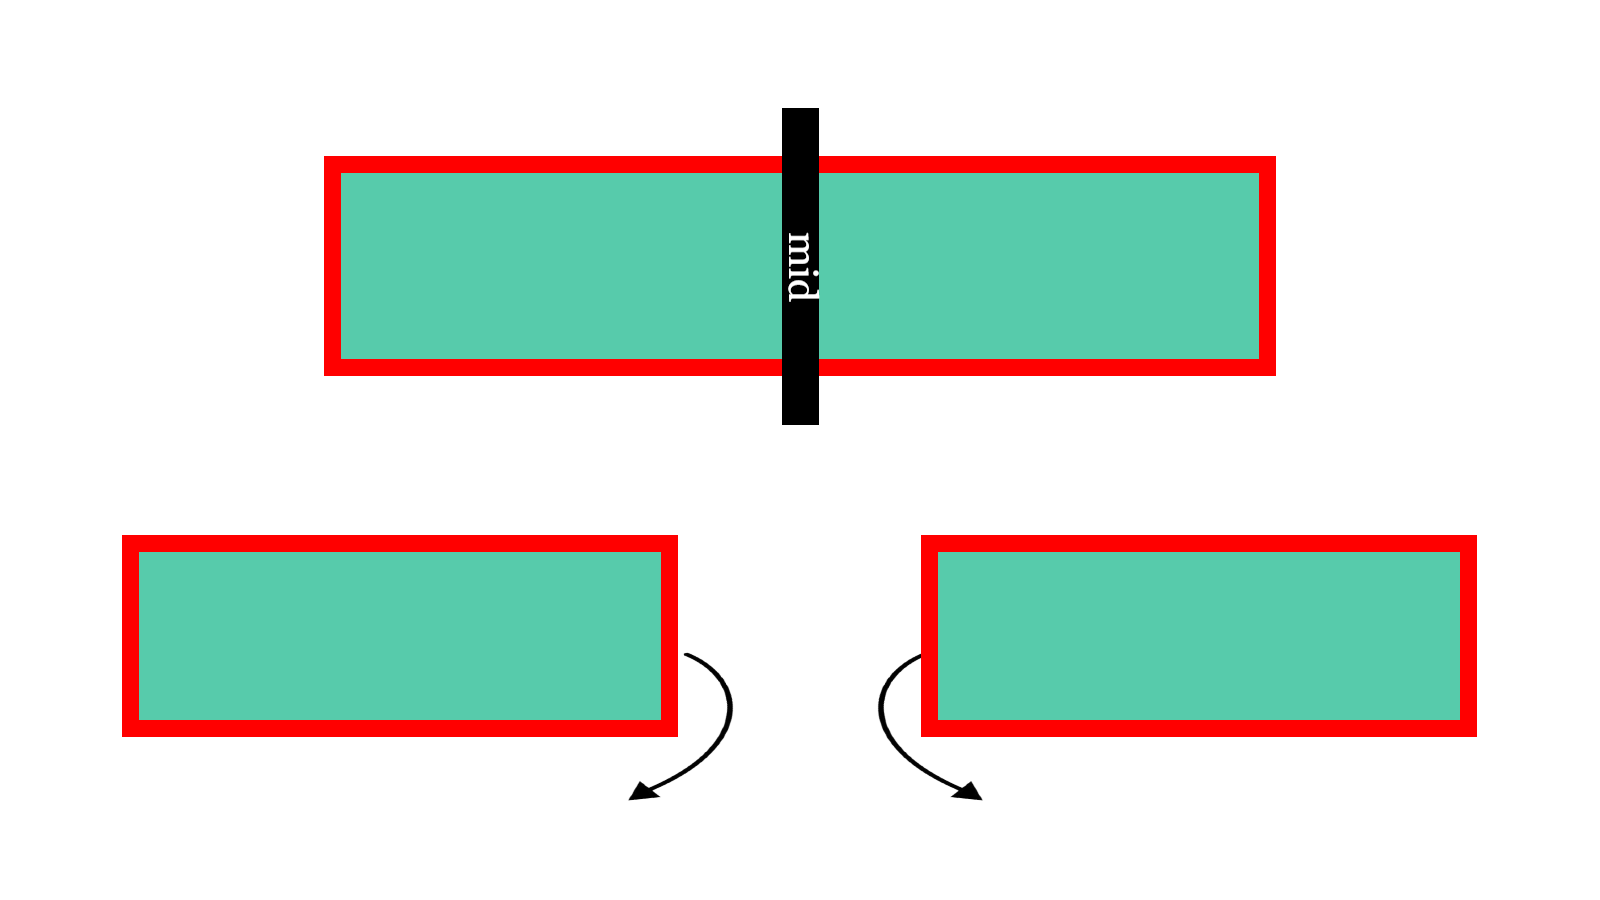

###Mantención
Al comenzar los bucles, es decir, durante cada i-ésima iteración en cada ciclo, cada uno analizará si la suma total del subarreglo $[mid-i,...,mid]$ da como resultado una suma mayor a la registrada en la iteración anterior. Si esto es verdadero, el valor anterior se reemplazará con la nueva suma máxima encontrada. Lo mismo ocurrirá al momento de analizar la suma en el subarreglo $[mid+1,...,mid+1+j]$ por cada j-ésima iteración.

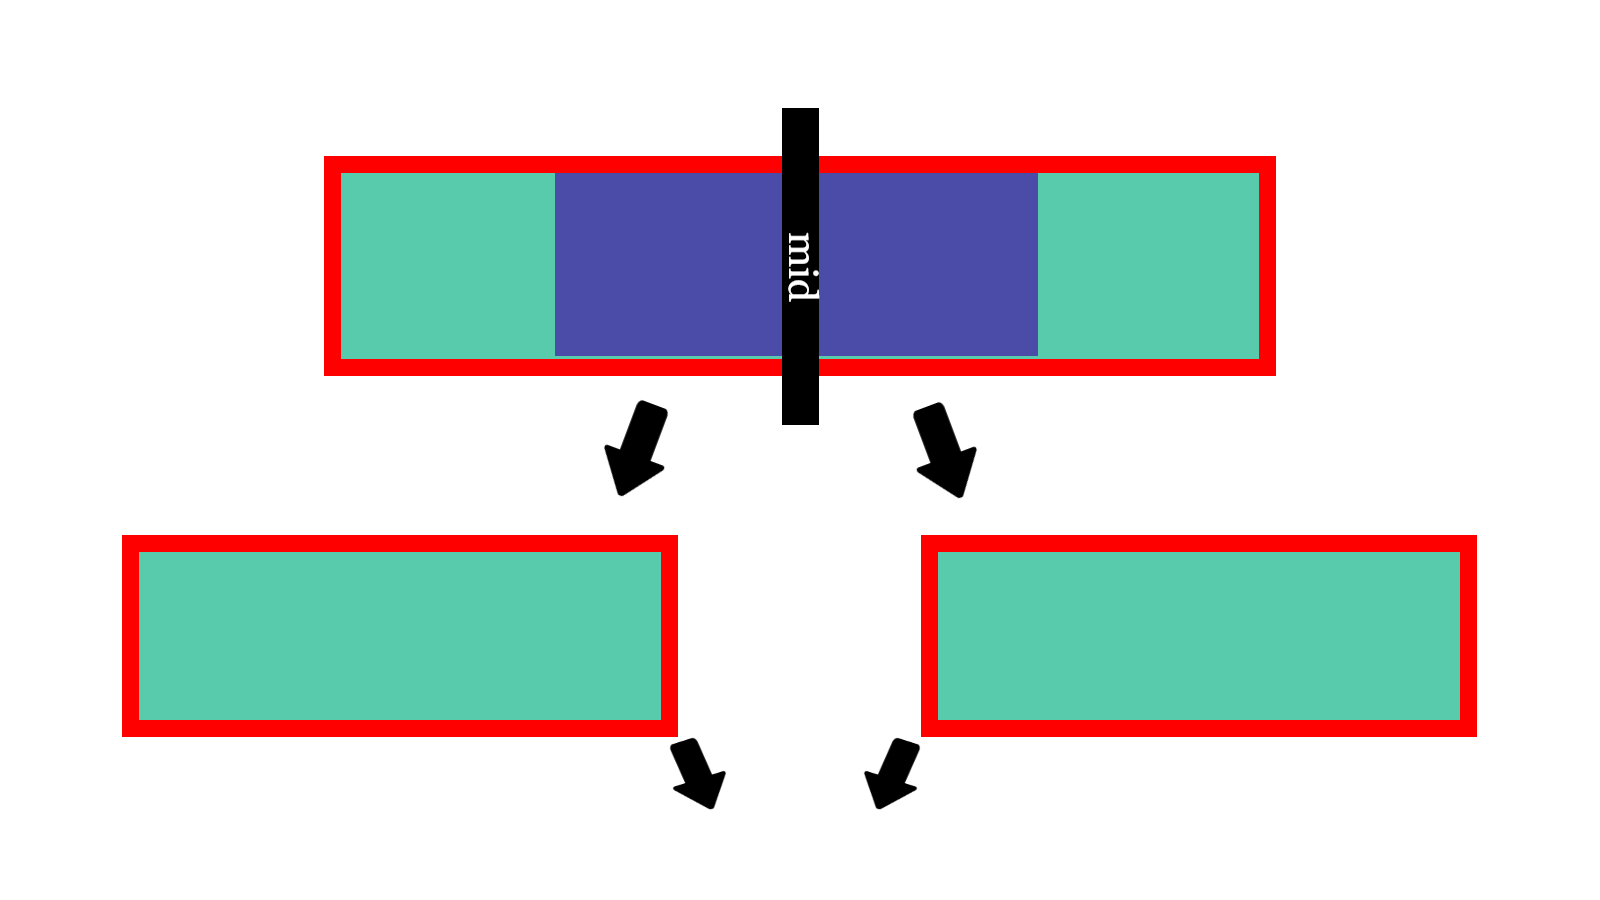

Luego, si se juntan ambos subarreglos máximos encontrados y se suman todos los valores consecutivos entre $A[i]$ y $A[j]$, veremos que el resultado de esto concordará con aquello dispuesto por el teorema, entregandonos la suma máxima de esta subsecuencia que contiene elementos del arreglo original.

###Correctitud
Finalmente, y tras verificar que la propiedad se cumple tanto antes como durante la ejecución de ambos bucles, podemos afirmar que el teorema propuesto es **correcto**, y al finalizar la i-ésima iteración se retornará una suma máxima de elementos consecutivos del arreglo $[a_1,a_2,a_3,...,a_n]$.

##Teorema 2 (Correctitud de la función subMaxArray)
*El algoritmo **subMaxArray** retorna la suma máxima de una subsecuencia consecutiva de elementos en un subarreglo $[i,...,j]$ que contenga los mismos elementos del arreglo original $[a_1,a_2,a_3,...,a_n]$.*

###Prueba del teorema
Al ser una función recursiva, el teorema debe ser analizado por medio del uso de **inducción matemática**.

**Hipótesis:** subMaxArray retorna una suma máxima que se encuentra en un subarreglo de elementos consecutivos del arreglo original.

**Caso base ($n = 1$):** Como el arreglo es de solo un elemento, la suma máxima es el mismo elemento, por lo que se retorna este, cumpliéndose así $P(1)$.

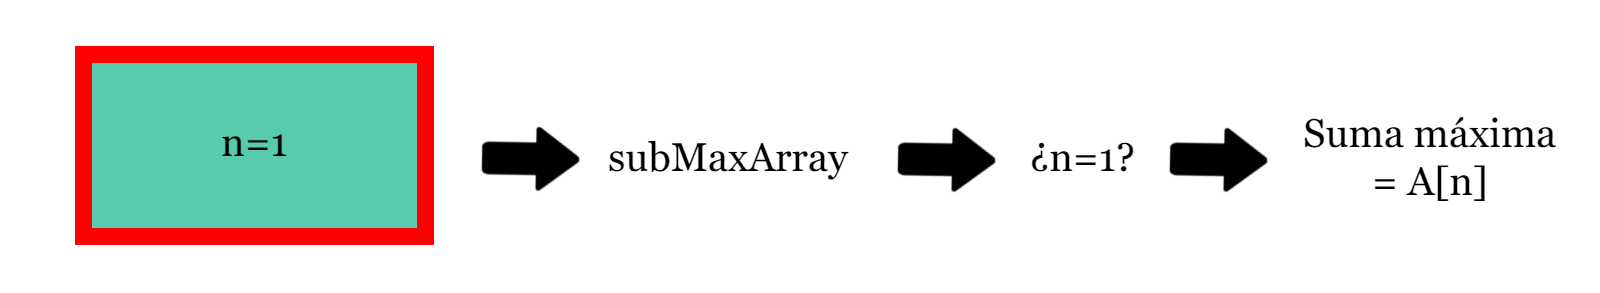

**Paso inductivo:** Ya habiendo verificado el caso base, ahora es necesario comprobar que sucede en los siguientes casos. Aquí, el algoritmo divide el arreglo recursivamente en dos subarreglos de tamaño $n/2$ cada uno, siendo el primero el lado izquierdo $L$ y el otro la derecha $R$, buscando en cada uno de ellos cuál es su suma máxima respectivamente.

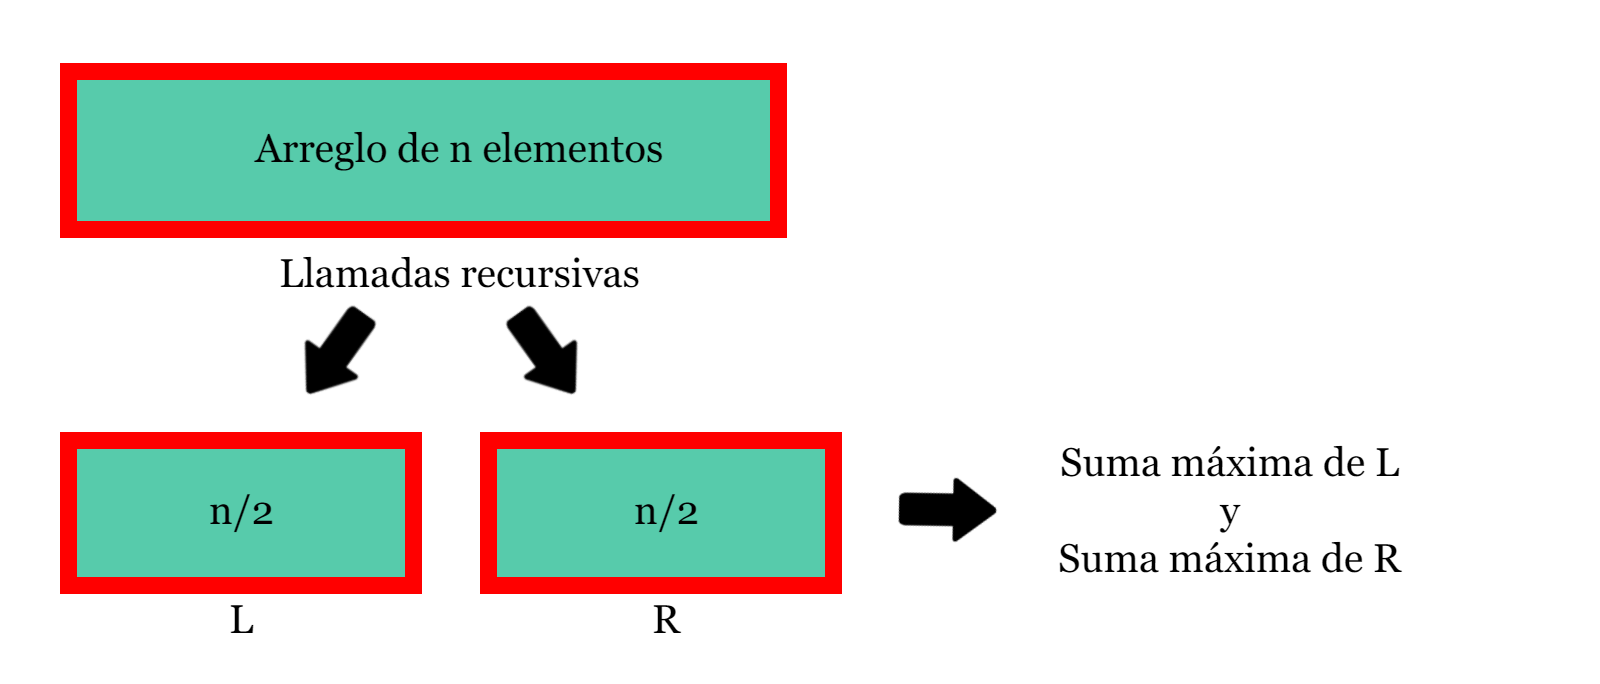

Adicionalmente, se efectuará la función **subMaxMidArray**, la cual, como se vio anteriormente, sí es correcta, por lo que también retornará su respectiva suma máxima que pase por el medio del arreglo original.

Como el tamaño de los subarreglos $L$ y $R$ son menores a $n$, si seguimos los pasos de la inducción podemos asumir que estos efectivamente sí retornarán su respectiva suma máxima.

Finalmente, como la función **retornará la máxima suma entre las tres que fueron encontradas**, es posible concluir que **subMaxArray** es correcta.

#4. Tiempo de ejecución

##Teorema (tiempo de ejecución)
Tanto en su peor caso como el mejor, el algoritmo **subMaxArray** tiene un tiempo de ejecución **$O(n*log(n))$**.

##Prueba del teorema

#5. Experimentos

##5.1 Comparación entre implementación "divide y vencerás" y Algoritmo de Kadane
Como primer experimento, se realizará una comparación entre los tiempos de ejecución del algoritmo estudiado y el llamado **"algoritmo de Kadane"**, el cual se encarga de realizar la misma tarea, pero que tiene una complejidad temporal menor de $O(n)$. Esto se comprobará utilizando un arreglo de tamaño $n$ entre 2 y 500, mientras que los elementos en su interior serán números aleatorios entre -1000 y 1000.

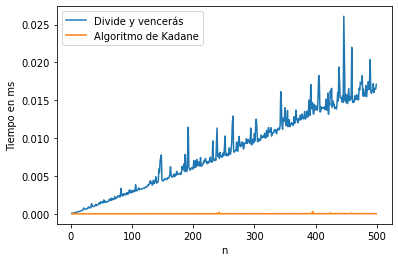

In [132]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

def kadaneAlg (A):
  maxSum = 0
  currentSum = 0

  for i in array:
    currentSum += i
    if currentSum < 0:
      currentSum = 0
    if (maxSum < currentSum):
      maxSum = currentSum
  return maxSum

x = []; y1 = []; y2 = []

for n in range(2,500):
  a = random.sample(range(-1000, 1000), n)

  r = repeat(setup="from __main__ import subMaxArray", stmt = f"subMaxArray({a},{0},{len(a)-1})", repeat = 1, number = 10)
  y1.append(r)
  t = repeat(setup="from __main__ import kadaneAlg", stmt = f"kadaneAlg({a})", repeat = 1, number = 10)
  y2.append(t)
  
  x.append(n)

plt.plot(x,y1)  
plt.plot(x,y2)
plt.legend(["Divide y vencerás","Algoritmo de Kadane"])

plt.xlabel('n')
plt.ylabel("Tiempo en ms")
plt.show()

###Análisis de resultados
Claramente en el gráfico podemos observar como el algoritmo de Kadane es significativamente mucho más rápido que aquel que estamos estudiando, lo cual se respalda considerando que, como ya se mencionó, su complejidad temporal es menor ($O(n) < O(n*log(n))$).

Ahora bien, lo interesante es que, aún considerando esta cota, a simple vista pareciera que Kadane es siempre lineal, incluso pareciendo una gráfica de $O(1)$, lo cual contradice nuestra postura. Sin embargo, podemos estudiarla por separado para descubrir si esto es cierto.

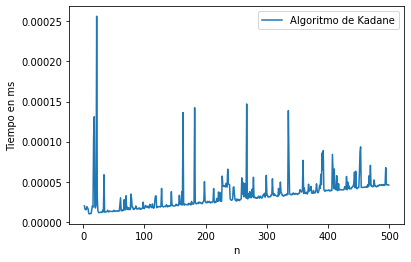

In [133]:
x = []; y = []
for n in range(2,500):
  a = random.sample(range(-1000,1000),n)

  r = repeat(setup="from __main__ import kadaneAlg", stmt = f"kadaneAlg({a})", repeat = 1, number = 10)

  x.append(n)
  y.append(r)

plt.plot(x,y)
plt.legend(["Algoritmo de Kadane"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")
plt.show()

En este nuevo gráfico que solo muestra el algoritmo de Kadane, sí es posible observar que, efectivamente, éste tiene una complejidad temporal $O(n)$. Sin embargo, es necesario notar que en ciertos casos la cota estará muy cerca de ser plana, lo cual se puede deber a la naturaleza "aleatoria" que tiene la generación de valores para el arreglo.

Además notese que los *peaks* que se observan durante la ejecución pueden ser una consecuencia de las irregularidades que posee el procesador.

##5.2 Comparación entre tres implementaciones ("Divide y vencerás", Kadane y "Fuerza Bruta")

A continuación se comparará el tiempo de ejecución entre nuestro algoritmo estudiado, Kadane, y la llamada búsqueda de suma máxima por **fuerza bruta**, la cual funciona a base de dos ciclos *for*, lo que resulta en una complejidad temporal igual a $O(n^2)$.

Al igual que el experimento, se trabajará con un arreglo de tamaño $n$ de 2 a 500, con elementos aleatorios que van en un rango de -1000 a 1000.

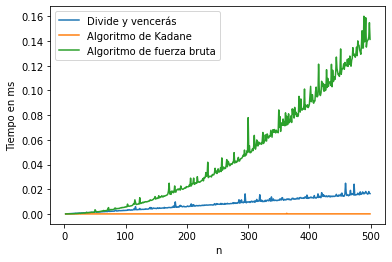

In [134]:
def bruteForceSum(A):
  maxSum = 0
  sumTillNow = 0
  for i in range(len(A)):
    sumTillNow = 0
    for j in range(i,len(A)):
      sumTillNow+=A[j]
      if sumTillNow > maxSum:
        maxSum = sumTillNow
  return maxSum

x = []; y1 = []; y2 = []; y3 = []
for n in range(2,500):
  a = random.sample(range(-1000, 1000), n)

  r = repeat(setup="from __main__ import subMaxArray", stmt = f"subMaxArray({a},{0},{len(a)-1})", repeat = 1, number = 10)
  y1.append(r)
  t = repeat(setup="from __main__ import kadaneAlg", stmt = f"kadaneAlg({a})", repeat = 1, number = 10)
  y2.append(t)
  z = repeat(setup="from __main__ import bruteForceSum", stmt = f"bruteForceSum({a})", repeat = 1, number = 10)
  y3.append(z)
  
  x.append(n)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Divide y vencerás","Algoritmo de Kadane", "Algoritmo de fuerza bruta"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")
plt.show()


###Análisis de resultados
En esta nueva comparación podemos ver cómo claramente la aplicación por *fuerza bruta* es efectivamente la más lenta, creciendo de forma cuadrática en el gráfico tal como se puede esperar debido a su complejidad $O(n^2)$, dejando muy atrás a los otros dos métodos, los que en comparación son significativamente más rápidos en su metodología.

Por lo que, en términos generales, podemos concluir que, en orden de mejor a peor para realizar este problema de optimización, tenemos las siguientes opciones de implementación:

1. Algoritmo de Kadane ($O(n)$)
2. Algoritmo "divide y vencerás" ($O(n*log(n))$)
3. Algoritmo "a fuerza bruta" ($O(n^2)$)